# Exercise 1

#### drivers of retention and engagement

#### Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from itertools import cycle, islice

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, GridSearchCV

from sklearn import linear_model, tree, ensemble, svm

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

from sklearn import tree
import graphviz 
import statsmodels.api as sm

from matplotlib import colors

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

#### Reading Data From File

In [2]:
df = pd.read_csv('ds-dataset.csv')

In [3]:
#cmap = colors.ListedColormap(['orange', 'blue'])

## 1. A Quick Look at the Data Structure

In [4]:
shape = df.shape
shape

(164933, 7)

In [5]:
attributes = list(df.columns.values)
attributes

['Unnamed: 0', 'ts', 'user_id', 'os', 'browser', 'plan', 'page']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164933 entries, 0 to 164932
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  164933 non-null  int64 
 1   ts          164933 non-null  object
 2   user_id     164933 non-null  object
 3   os          164933 non-null  object
 4   browser     164755 non-null  object
 5   plan        164437 non-null  object
 6   page        164933 non-null  object
dtypes: int64(1), object(6)
memory usage: 8.8+ MB


#### Warning: there are missing values on the plan and browser attributes that should be handled later

In [7]:
df.describe()

,Unnamed: 0
count,164933.000000
mean,82466.000000
std,47612.200311
min,0.000000
25%,41233.000000
50%,82466.000000
75%,123699.000000
max,164932.000000


In [8]:
df.head()

,Unnamed: 0,ts,user_id,os,browser,plan,page
0,0,2020-01-02 20:17:20.623000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge
1,1,2020-01-03 10:22:31.619000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete
2,2,2020-01-05 02:21:24.924000,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg
3,3,2020-01-05 02:21:44.378000,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate
4,4,2020-01-19 02:23:02.320000,212955203693754102065312977639302287127,windows,Firefox,monthly,compress


In [9]:
df.nunique()

Unnamed: 0    164933
ts            161529
user_id         8213
os                 5
browser            6
plan               2
page              17
dtype: int64

#### Looking at top 20% of users who return to the platform (loyal users) 

Warning! If you open the CSV file with Excel, you might face a problem loading and reading 'long int' data types properly as Excel interprets them as scientific numbers. 

Solution: download the dataset again and don't open it with Excel!

In [10]:
xd = df["user_id"].value_counts()
xd

62966500438657575252837451397712134966     5506
265995907415006206495118940319872679990    1964
149778293702096290805571147151318472123    1521
70783149580088580103192490613649001201     1432
196957829457798244032145924719876605144    1390
                                           ... 
336003053065563500539538209455649835308       1
258244131330430811567273355797911246669       1
48134381397534054927761314128607196751        1
311786433406890288403026403428342153563       1
250795684507578043918814443988525071380       1
Name: user_id, Length: 8213, dtype: int64

In [11]:
hu = xd[:xd.shape[0]//5]
hu.to_frame()
tmp = pd.DataFrame({'user_id':hu.index, 'count':hu.values})
lst = tmp["user_id"]

In [12]:
cut = df.query('user_id in @lst')
cut

,Unnamed: 0,ts,user_id,os,browser,plan,page
0,0,2020-01-02 20:17:20.623000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge
1,1,2020-01-03 10:22:31.619000,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete
2,2,2020-01-05 02:21:24.924000,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg
3,3,2020-01-05 02:21:44.378000,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate
4,4,2020-01-19 02:23:02.320000,212955203693754102065312977639302287127,windows,Firefox,monthly,compress
...,...,...,...,...,...,...,...
164927,164927,2021-07-20 22:23:23.743000,12982055457907492778843056800624501939,windows,Firefox,monthly,ppt
164928,164928,2021-07-21 21:10:48.798000,62966500438657575252837451397712134966,windows,Firefox,monthly,merge
164929,164929,2021-07-22 01:08:57.862000,3805680386757704639788158525923521991,windows,Firefox,yearly,unlock
164930,164930,2021-07-23 01:37:04.588000,2807863584987473602353765509767060413,windows,Firefox,monthly,extract


In [13]:
features = cut.drop("Unnamed: 0", 1)
features = features.drop("user_id", 1)
features = features.drop("ts", 1)
features

C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,os,browser,plan,page
0,mac_os,Firefox,monthly,merge
1,mac_os,Firefox,monthly,delete
2,windows,Firefox,monthly,jpg
3,windows,Firefox,monthly,rotate
4,windows,Firefox,monthly,compress
...,...,...,...,...
164927,windows,Firefox,monthly,ppt
164928,windows,Firefox,monthly,merge
164929,windows,Firefox,yearly,unlock
164930,windows,Firefox,monthly,extract


In [14]:
tmp = pd.DataFrame({'user_id':xd.index, 'count':xd.values})
tmp

,user_id,count
0,62966500438657575252837451397712134966,5506
1,265995907415006206495118940319872679990,1964
2,149778293702096290805571147151318472123,1521
3,70783149580088580103192490613649001201,1432
4,196957829457798244032145924719876605144,1390
...,...,...
8208,336003053065563500539538209455649835308,1
8209,258244131330430811567273355797911246669,1
8210,48134381397534054927761314128607196751,1
8211,311786433406890288403026403428342153563,1


In [15]:
mean = tmp["count"].mean()
print("mean", mean)
median = tmp["count"].median()
print("median", median)
mean = median

mean 20.08194326068428
median 3.0


In [16]:
## add returns after comparision

In [17]:
returned="Yes"
changing = df.copy()
tmp["returned"]= returned
changing["returned"] = returned
changing = changing.drop("Unnamed: 0", 1)
changing = changing.drop("ts", 1)
users = tmp["user_id"][tmp["count"]<mean]

user = pd.DataFrame({'id':users.index, 'user_id':users.values})
lst = user["user_id"].tolist()
tmp["returned"][tmp["count"]<mean]="No"
for i in range(changing.shape[0]):
    if changing.iloc[i]["user_id"] in lst:
        changing.iloc[i]["returned"] = "No"
        lst.remove(changing.iloc[i]["user_id"])
changing

C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
...,...,...,...,...,...,...
164928,62966500438657575252837451397712134966,windows,Firefox,monthly,merge,Yes
164929,3805680386757704639788158525923521991,windows,Firefox,yearly,unlock,Yes
164930,2807863584987473602353765509767060413,windows,Firefox,monthly,extract,Yes
164931,125970897076888770561054119912712360728,windows,Firefox,yearly,edit,Yes


In [18]:
save = changing.copy()

## 2. Discover and Visualize the Data to Gain Insights - Version 1

In [21]:
plt.style.use('seaborn-white')

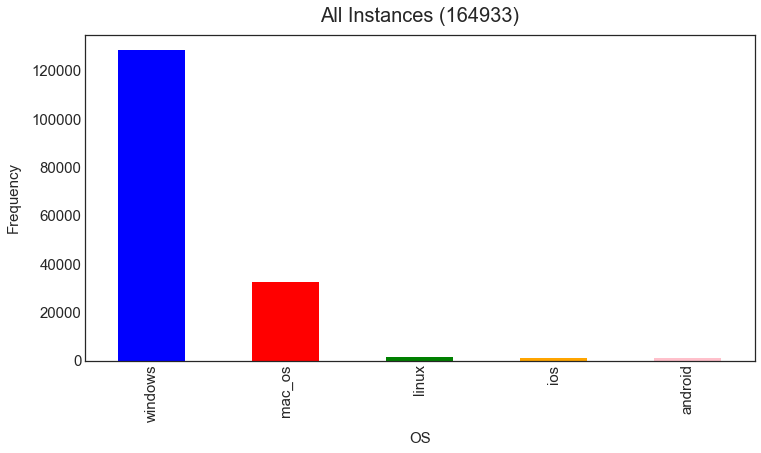

In [226]:
figure(figsize=(12, 6))
my_colors_1 = list(islice(cycle(['b', 'r','g','orange','pink']), None, len(df)))
df['os'].value_counts().plot(kind='bar', color=my_colors_1 )
plt.xlabel("OS", labelpad=10, size = 15)
plt.ylabel("Frequency", labelpad=10, size = 15)
plt.title("All Instances (164933)", y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

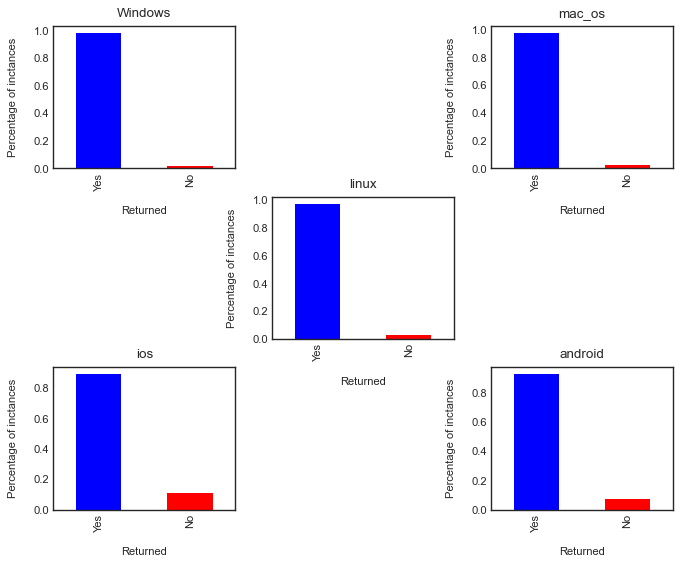

In [64]:
figure(figsize=(10, 8), dpi=80)
my_colors_2 = list(islice(cycle(['b', 'r']), None, len(df)))
plt.subplot(331)
changing.loc[changing["os"]=="windows", "returned"].value_counts(normalize=True).plot(kind='bar', color= my_colors_2)
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of inctances", labelpad=14)
plt.title("Windows", y=1.02);
plt.subplot(333)
changing.loc[changing["os"]=="mac_os", "returned"].value_counts(normalize=True).plot(kind='bar', color= my_colors_2)
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of inctances", labelpad=14)
plt.title("mac_os", y=1.02);
plt.subplot(335)
changing.loc[changing["os"]=="linux", "returned"].value_counts(normalize=True).plot(kind='bar', color= my_colors_2)
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of inctances", labelpad=14)
plt.title("linux", y=1.02);
plt.subplot(337)
changing.loc[changing["os"]=="ios", "returned"].value_counts(normalize=True).plot(kind='bar', color= my_colors_2)
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of inctances", labelpad=14)
plt.title("ios", y=1.02);
plt.subplot(339)
changing.loc[changing["os"]=="android", "returned"].value_counts(normalize=True).plot(kind='bar', color= my_colors_2)
plt.xlabel("Returned", labelpad=14)
plt.ylabel("Percentage of inctances", labelpad=14)
plt.title("android", y=1.02);

#### While we are focusing on desktop systems as they seem to be more trusted by users, we should improve the mobile applications' UX or UI.

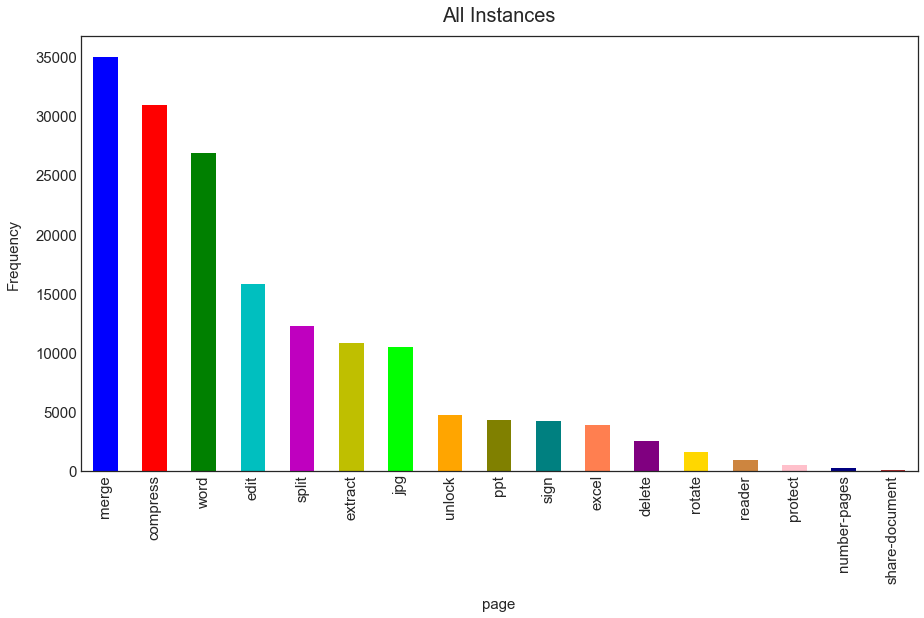

In [227]:
figure(figsize=(15, 8))
my_colors_3 = list(islice(cycle(['b','r','g','c','m','y','lime','orange','olive','teal','coral','purple','gold','peru','pink','navy','brown']), None, len(df)))
df['page'].value_counts().plot(kind='bar', color = my_colors_3 )
plt.xlabel("page", labelpad=14, size=15)
plt.ylabel("Frequency", labelpad=14, size=15)
plt.title("All Instances", y=1.02, size=20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

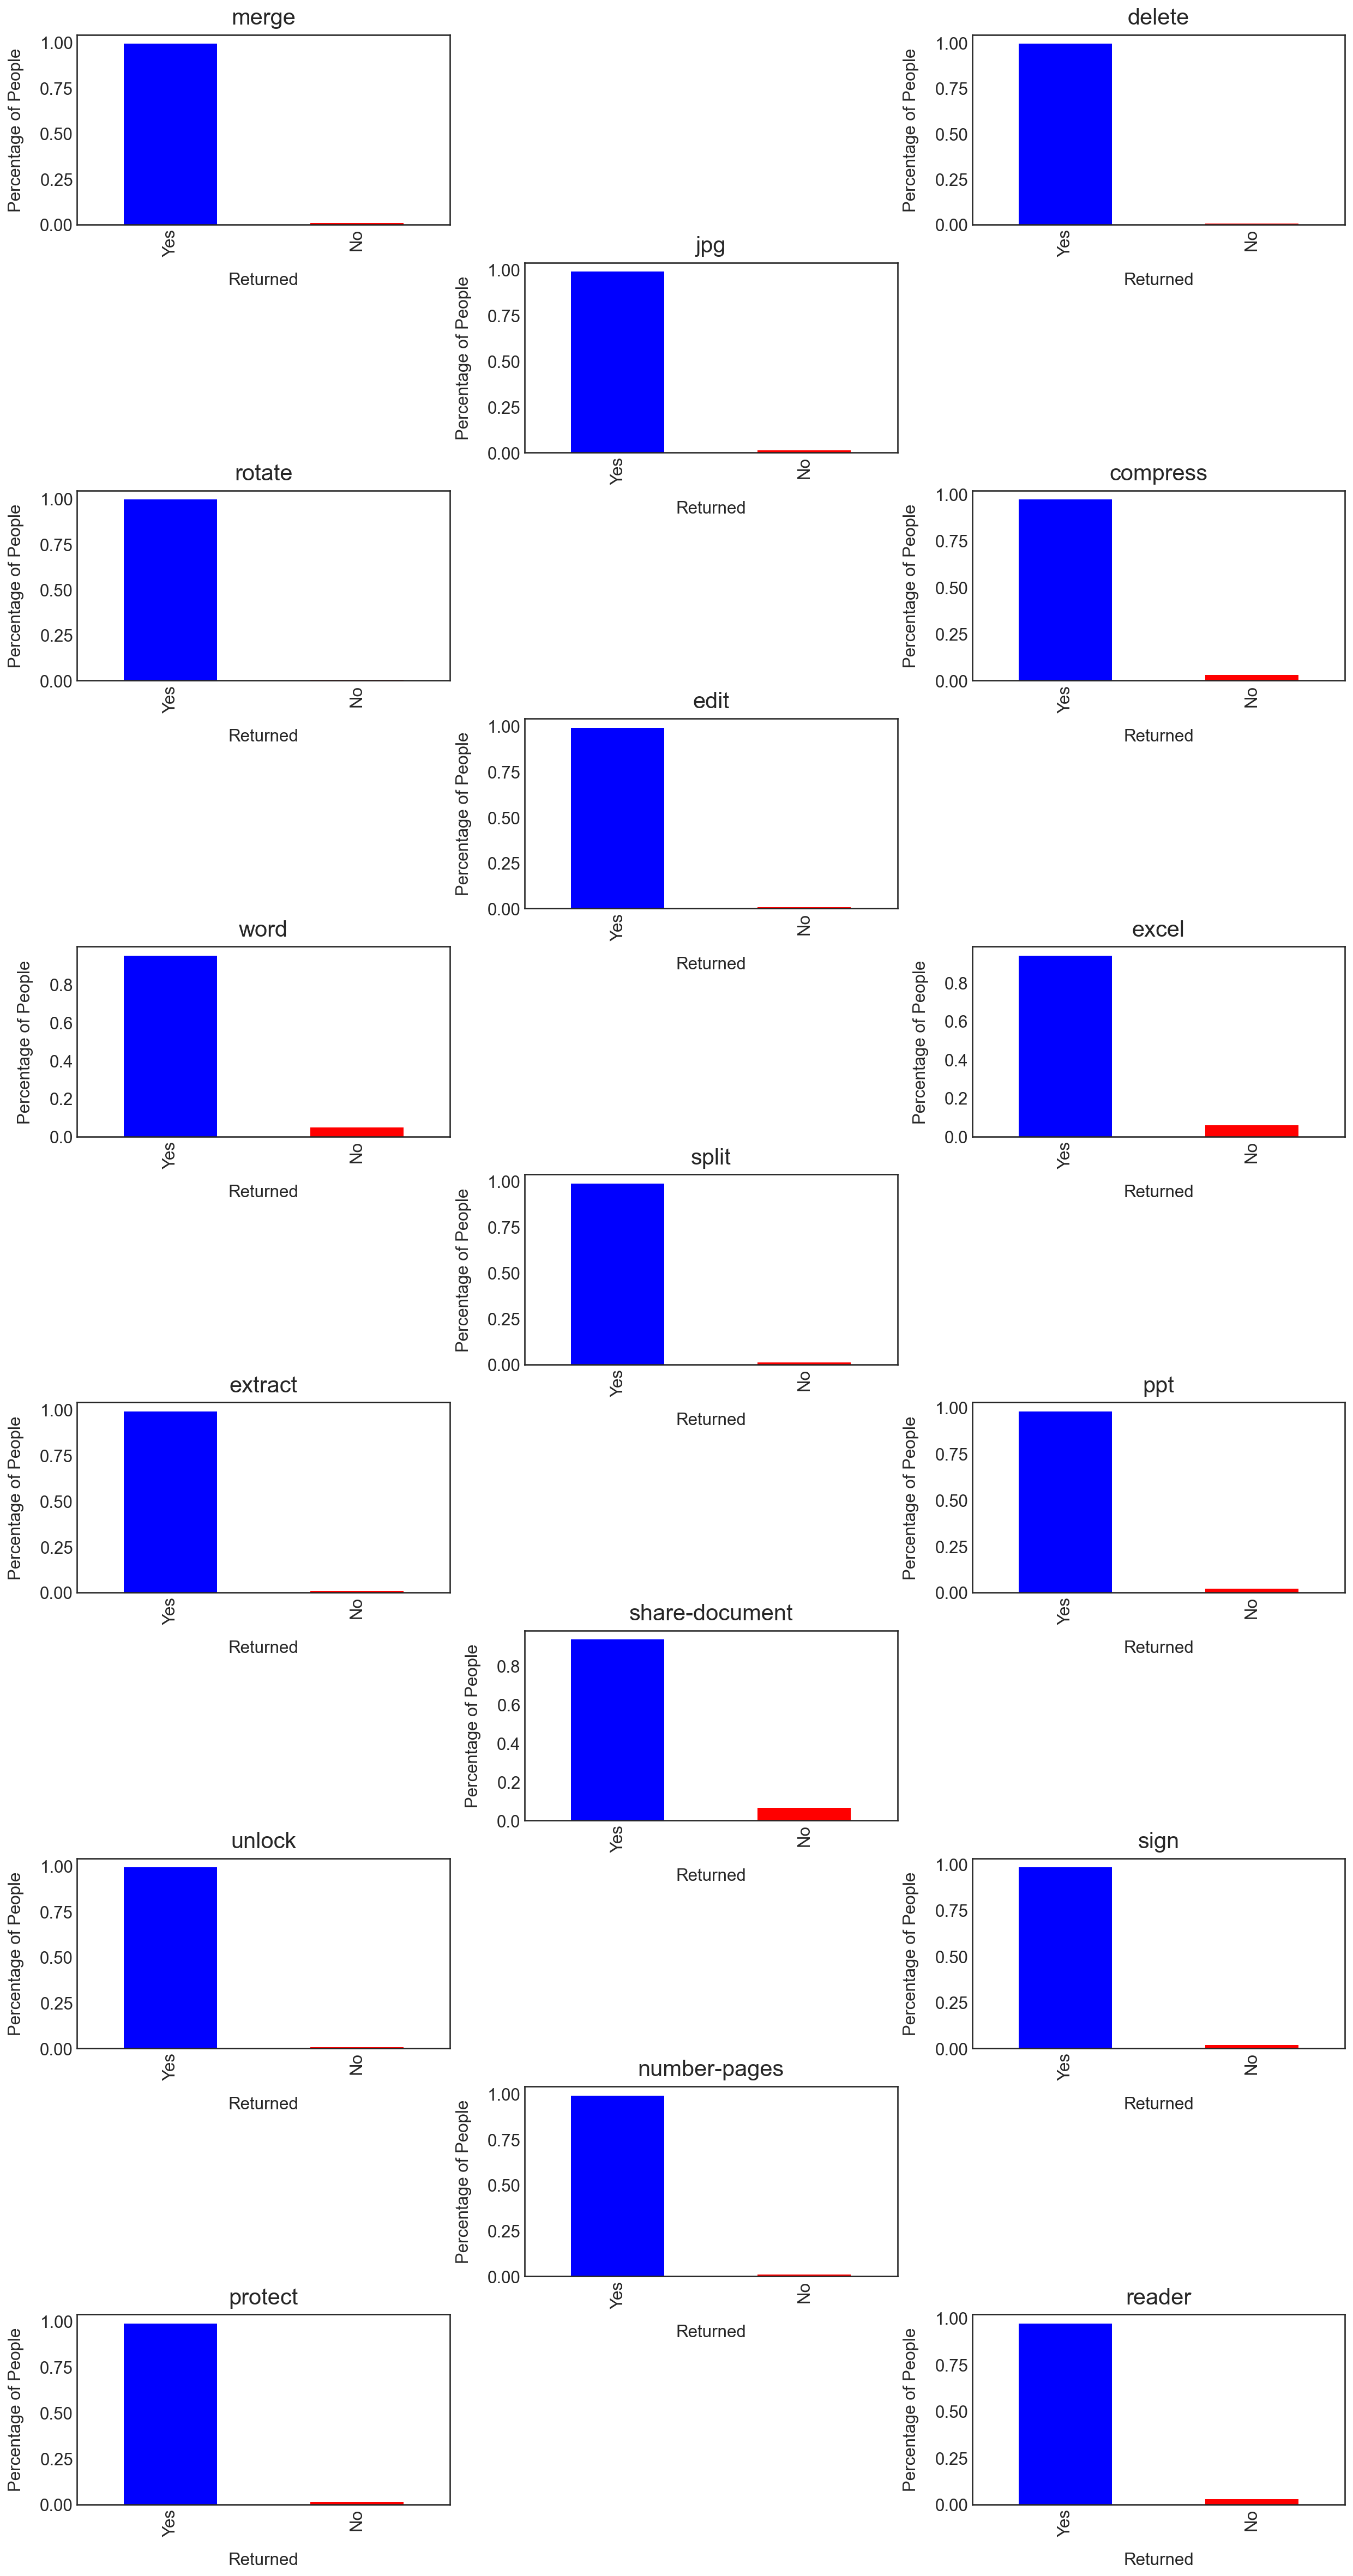

In [56]:
figure(figsize=(20, 40), dpi=150)
my_colors_2 = list(islice(cycle(['b', 'r']), None, len(df)))
pages = changing['page'].unique()
for i in range(pages.shape[0]):
    plt.subplot(11, 3, 1+i*2)
    changing.loc[changing["page"]==pages[i], "returned"].value_counts(normalize=True).plot(kind='bar', color = my_colors_2)
    plt.xlabel("Returned", labelpad=14, size = 15)
    plt.ylabel("Percentage of Instances", labelpad=14, size = 15)
    plt.title(pages[i], y=1.02, size = 20)
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15)

#### Notification to Excel and shared document users: we have other products that you might try 
#### Word users are a lot compared to the other product users. So thaat0s why a larger portion is not returning. 

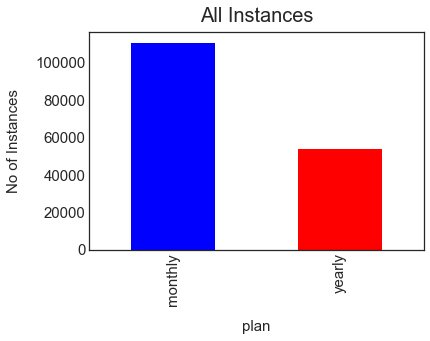

In [228]:
df['plan'].value_counts().plot(kind='bar',color = my_colors_2)
plt.xlabel("plan", labelpad=14, size=15)
plt.ylabel("No of Instances", labelpad=14, size=15)
plt.title("All Instances", y=1.02, size=20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

### Data Cleaning

#### Handling missing values ( replacing with mode as the most likely answer )

In [41]:
for column in changing.columns:
    changing[column].fillna(changing[column].mode()[0], inplace=True)

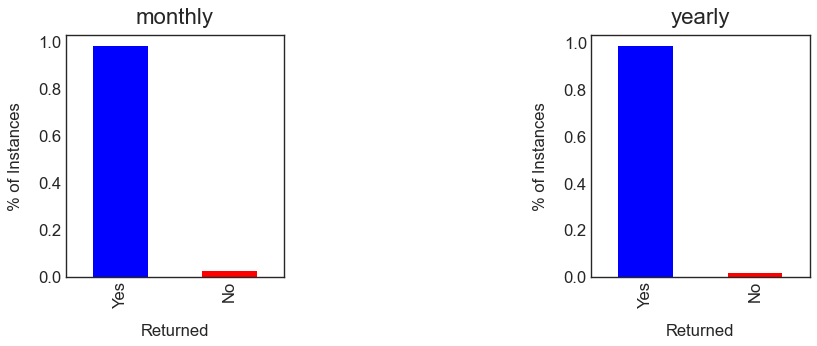

In [231]:
figure(figsize=(12, 4), dpi=80)
plans = changing['plan'].unique()
for i in range(plans.shape[0]):
    plt.subplot(1, 3, 1+i*2)
    changing.loc[changing["plan"]==plans[i], "returned"].value_counts(normalize=True).plot(kind='bar', color=my_colors_2)
    plt.xlabel("Returned", labelpad=14, size = 15)
    plt.ylabel("% of Instances", labelpad=14, size = 15)
    plt.title(plans[i], y=1.02, size = 20)
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15)

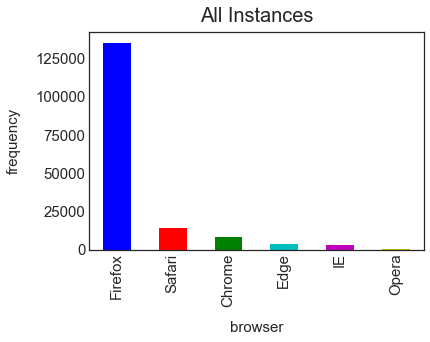

In [78]:
my_colors_4 = list(islice(cycle(['b','r','g','c','m','y']), None, len(df)))
df['browser'].value_counts().plot(kind='bar', color = my_colors_4)
plt.xlabel("browser", labelpad=14, size = 15)
plt.ylabel("frequency", labelpad=14, size = 15)
plt.title("All Instances", y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

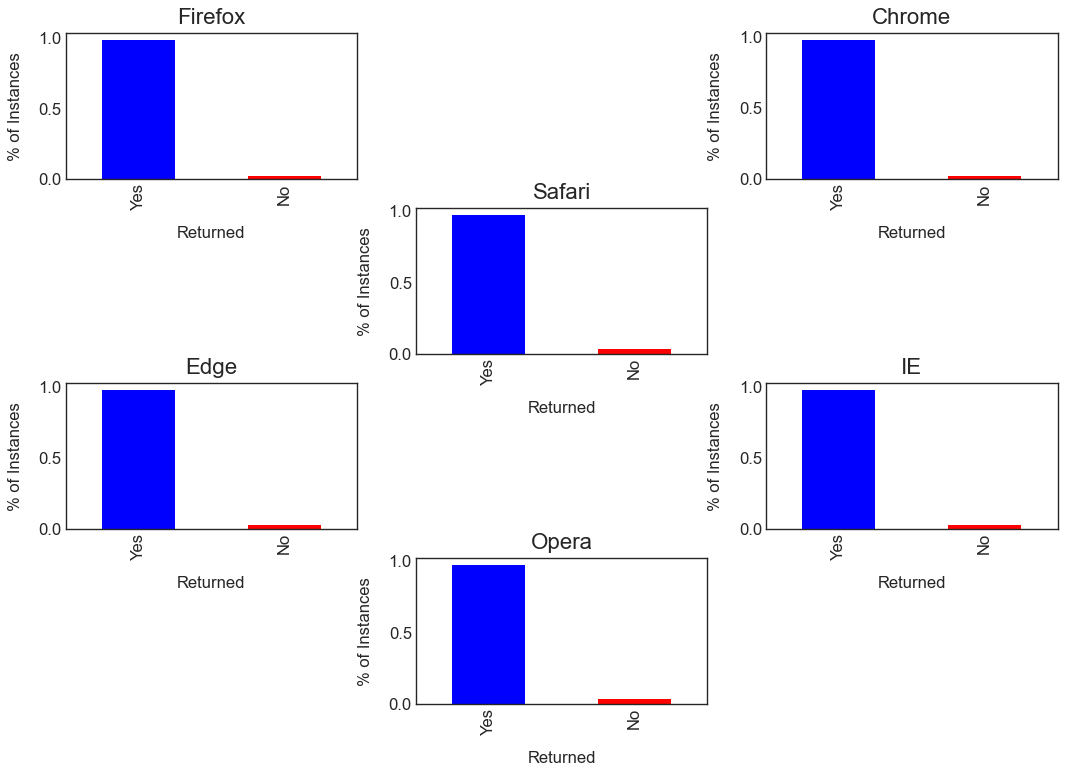

In [82]:
figure(figsize=(16, 14), dpi=80)
browsers = changing['browser'].unique()
for i in range(browsers.shape[0]):
    plt.subplot(5, 3, 1+i*2)
    changing.loc[changing["browser"]==browsers[i], "returned"].value_counts(normalize=True).plot(kind='bar', color = my_colors_2 )
    plt.xlabel("Returned", labelpad=14, size = 15)
    plt.ylabel("% of Instances", labelpad=14, size = 15)
    plt.title(browsers[i], y=1.02, size = 20)
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15)

In [50]:
changing = changing.drop("user_id", 1)
changing

C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,os,browser,plan,page,returned
0,mac_os,Firefox,monthly,merge,Yes
1,mac_os,Firefox,monthly,delete,Yes
2,windows,Firefox,monthly,jpg,Yes
3,windows,Firefox,monthly,rotate,Yes
4,windows,Firefox,monthly,compress,Yes
...,...,...,...,...,...
164928,windows,Firefox,monthly,merge,Yes
164929,windows,Firefox,yearly,unlock,Yes
164930,windows,Firefox,monthly,extract,Yes
164931,windows,Firefox,yearly,edit,Yes


#### We could save our data for weka (.arff) software to test our ML approachess separately

https://ikuz.eu/csv2arff/ 
is used to save '.arff' 
We should use the updated data (changing) to make sure that we do not face the imbalanced issues while working with models

In [51]:
changing.to_csv("changed.csv")

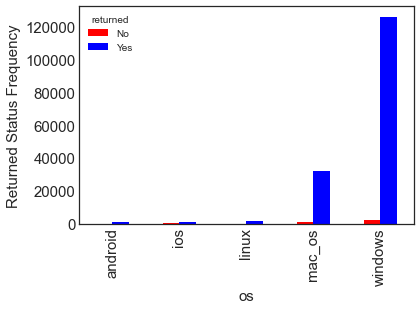

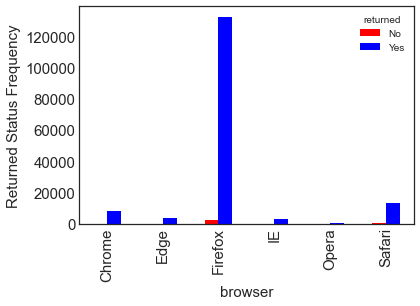

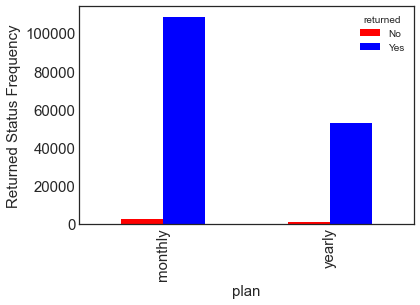

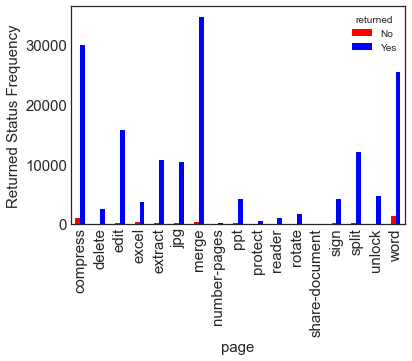

In [86]:
my_colors_5 = list(islice(cycle(['r', 'b']), None, len(df)))
attributes = list(changing.columns.values)
attributes.remove(attributes[len(attributes)-1])
for i in attributes:

    pd.crosstab(changing[i], changing.returned).plot(kind = 'bar', color = my_colors_5)
    plt.xlabel('{}'.format(i), size = 15)
    plt.ylabel('Returned Status Frequency', size = 15)
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15)
    
plt.show()

## 3. Prepare the Data for Machine Learning Algorithms
#### Feeding the data with the proper format to ML models 

In [87]:
uniques = list(map(lambda col: changing[col].nunique(), attributes))
dikt = dict(zip(attributes, uniques))

sorted(dikt.items(), key=lambda x: x[1])

[('plan', 2), ('os', 5), ('browser', 6), ('page', 17)]

In [88]:
for var in attributes:
    cList = 'var' + '_' + 'var'
    cList = pd.get_dummies(changing[var], prefix=var)
    df_New = pd.concat([changing, cList],axis = 1)
    changing = df_New

changing

,os,browser,plan,page,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,mac_os,Firefox,monthly,merge,Yes,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,mac_os,Firefox,monthly,delete,Yes,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,windows,Firefox,monthly,jpg,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,windows,Firefox,monthly,rotate,Yes,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,windows,Firefox,monthly,compress,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164928,windows,Firefox,monthly,merge,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164929,windows,Firefox,yearly,unlock,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
164930,windows,Firefox,monthly,extract,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164931,windows,Firefox,yearly,edit,Yes,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [89]:
data_vars = changing.columns.values.tolist()

to_keep = [i for i in data_vars if i not in attributes]

to_keep

['returned',
 'os_android',
 'os_ios',
 'os_linux',
 'os_mac_os',
 'os_windows',
 'browser_Chrome',
 'browser_Edge',
 'browser_Firefox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'plan_monthly',
 'plan_yearly',
 'page_compress',
 'page_delete',
 'page_edit',
 'page_excel',
 'page_extract',
 'page_jpg',
 'page_merge',
 'page_number-pages',
 'page_ppt',
 'page_protect',
 'page_reader',
 'page_rotate',
 'page_share-document',
 'page_sign',
 'page_split',
 'page_unlock',
 'page_word']

In [90]:
ready = changing[to_keep]
ready.columns.values

array(['returned', 'os_android', 'os_ios', 'os_linux', 'os_mac_os',
       'os_windows', 'browser_Chrome', 'browser_Edge', 'browser_Firefox',
       'browser_IE', 'browser_Opera', 'browser_Safari', 'plan_monthly',
       'plan_yearly', 'page_compress', 'page_delete', 'page_edit',
       'page_excel', 'page_extract', 'page_jpg', 'page_merge',
       'page_number-pages', 'page_ppt', 'page_protect', 'page_reader',
       'page_rotate', 'page_share-document', 'page_sign', 'page_split',
       'page_unlock', 'page_word'], dtype=object)

In [91]:
ready['returned'] = ready['returned'].replace(['Yes','No'], [1,0])

C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
ready

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164928,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
164929,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
164930,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
164931,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


### Create Test and Train Sets

In [93]:
label = np.array(ready['returned'])

features = ready.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [94]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

## 4. Select and Train a Machine Learning Model (iterative procedure)

### Random Forest - Ver1 

In [95]:
# hyper parameter tuning manual

In [96]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [97]:
y_pred = rf.predict(test_X)

In [98]:
acc = accuracy_score(test_Y, y_pred)
acc

0.9783247946160609

#### WOW ! ... But accuracy alone is not a good performance measure. Let's look at the confusion matrix.

In [100]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    1   711]
 [    4 32271]]

Classification Report
              precision    recall  f1-score   support

           0       0.20      0.00      0.00       712
           1       0.98      1.00      0.99     32275

    accuracy                           0.98     32987
   macro avg       0.59      0.50      0.50     32987
weighted avg       0.96      0.98      0.97     32987



#### Terrible outcome! 

### Cross Validation & RandomForest - ver1

In [101]:
# 3, 5, 7 was tested

In [102]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 141371,Validation set:23562
Fold:2, Train set: 141371,Validation set:23562
Fold:3, Train set: 141371,Validation set:23562
Fold:4, Train set: 141371,Validation set:23562
Fold:5, Train set: 141371,Validation set:23562
Fold:6, Train set: 141371,Validation set:23562
Fold:7, Train set: 141372,Validation set:23561


In [103]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.97903404 0.97907648 0.9789916  0.97903404 0.97882183 0.9789916
 0.9789907 ]
Average score: 0.98


### Gird Search on the space of parameters - ver1

In [104]:
# 3*3 Grid

In [105]:
model = GradientBoostingClassifier(random_state=13)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kfold, refit=True)
result = search.fit(train_X, train_Y)

In [106]:
best = result.best_estimator_

y_pred = best.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.9784157395337557

In [107]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    0   712]
 [    0 32275]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       712
           1       0.98      1.00      0.99     32275

    accuracy                           0.98     32987
   macro avg       0.49      0.50      0.49     32987
weighted avg       0.96      0.98      0.97     32987



C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Support Vector Machines (SVM) - ver1

In [108]:
#clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-2))

clf.fit(train_X, train_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='sigmoid', random_state=13,
                     tol=0.01))])

In [109]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9755964470852154

In [110]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[    4   708]
 [   97 32178]]

Classification Report
              precision    recall  f1-score   support

           0       0.04      0.01      0.01       712
           1       0.98      1.00      0.99     32275

    accuracy                           0.98     32987
   macro avg       0.51      0.50      0.50     32987
weighted avg       0.96      0.98      0.97     32987



### Multi-layer Perceptron - ver 1 

In [111]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 8, 4, 2), random_state=13, max_iter=100, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(131946, 30)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 8, 4, 2),
              learning_rate_init=0.0001, max_iter=100, random_state=13,
              tol=1e-05)

In [112]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9784157395337557

In [113]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[    0   712]
 [    0 32275]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       712
           1       0.98      1.00      0.99     32275

    accuracy                           0.98     32987
   macro avg       0.49      0.50      0.49     32987
weighted avg       0.96      0.98      0.97     32987



C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Saeid\Prj100\SA_31_retention_calc\my_env\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

array([1], dtype=int64)

### Decision Tree - ver 1

In [114]:
clf = tree.DecisionTreeClassifier()
fig = clf.fit(train_X, train_Y)

In [115]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9783247946160609

In [116]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[    1   711]
 [    4 32271]]

Classification Report
              precision    recall  f1-score   support

           0       0.20      0.00      0.00       712
           1       0.98      1.00      0.99     32275

    accuracy                           0.98     32987
   macro avg       0.59      0.50      0.50     32987
weighted avg       0.96      0.98      0.97     32987



array([0, 1], dtype=int64)

### Single layer Perceptron - ver 1

In [117]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     76.58
Date:                Sun, 26 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:30:02   Log-Likelihood:                 70824.
No. Observations:              131946   AIC:                        -1.416e+05
Df Residuals:                  131916   BIC:                        -1.413e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          8.213e+08   6.17e+09      0.133      0.894   -1.13e+10    1.29e+10
x2          8.213e+08   6.17e+09      0.133      0.894   -1.13e+10    1.29e+10
x3          8.213e+08   6.17e+09      0.133      0.894   -1.13e+10    1.29e+10
x4          8.213e+08   6.17e+09      0.133      0.894   -1.13e+10    1.29e+10
x5          8.213e+08   6.17e+09      0.133      0.894   -1.13e+10    1.29e+10
x6         -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x7         -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x8         -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x9         -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x10        -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x11        -2.978e+08   4.33e+09     -0.069      0.945   -8.79e+09     8.2e+09
x12          9.09e+06   7.61e+09      0.001      0.999   -1.49e+10    1.49e+10
x13          9.09e+06   7.61e+09      0.001      0.999   -1.49e+10    1.49e+10
x14        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x15        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x16        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x17        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x18        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x19        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x20        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x21        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x22        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x23        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x24        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x25        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x26        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x27        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x28        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x29        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
x30        -5.325e+08   2.65e+09     -0.201      0.841   -5.72e+09    4.66e+09
==============================================================================
Omnibus:                   154754.627   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10548582.109
Skew:                          -6.554   Prob(JB):                         0.00
Kurtosis:                      44.796   Cond. No.                     6.26e+13
==============================================================================

N

### Warning: After running the ML models version 1, we notice a problem with data: Imbalanced Data Issue >> we should try another iterations with updated approach and datasets >>  version 2, 3, 4

In [118]:
yes_percent = ready["returned"].sum()/len(ready)
yes_percent
yes_total =ready["returned"].sum()
yes_total

161479

In [119]:
no_percent = 1 - yes_percent
no_percent
no_total = len(ready) - yes_total
no_total

3454

### With these results, we notice that data is imbalanced. A approach for handling the imbalanced data is downsampling and upsampling: the idea here is to choose one record for each customer so they don't flood and overpower the data (mode). Another approach is merge a user into one row (all_in_one)!

In [120]:
for column in save.columns:
    save[column].fillna(save[column].mode()[0], inplace=True)
save

,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
...,...,...,...,...,...,...
164928,62966500438657575252837451397712134966,windows,Firefox,monthly,merge,Yes
164929,3805680386757704639788158525923521991,windows,Firefox,yearly,unlock,Yes
164930,2807863584987473602353765509767060413,windows,Firefox,monthly,extract,Yes
164931,125970897076888770561054119912712360728,windows,Firefox,yearly,edit,Yes


In [121]:
attributes = list(df.columns.values)
print(attributes)
attributes.remove('ts')
attributes.remove('Unnamed: 0')
attributes.remove('user_id')
attributes

['Unnamed: 0', 'ts', 'user_id', 'os', 'browser', 'plan', 'page']


['os', 'browser', 'plan', 'page']

In [122]:
uniques = list(map(lambda col: save[col].nunique(), attributes))
dikt = dict(zip(attributes, uniques))

sorted(dikt.items(), key=lambda x: x[1])

[('plan', 2), ('os', 5), ('browser', 6), ('page', 17)]

In [123]:
xFd = save.copy()
for var in attributes:
    cList = 'var' + '_' + 'var'
    cList = pd.get_dummies(xFd[var], prefix=var)
    df_New = pd.concat([xFd, cList],axis = 1)
    xFd = df_New

xFd

,user_id,os,browser,plan,page,returned,os_android,os_ios,os_linux,os_mac_os,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164928,62966500438657575252837451397712134966,windows,Firefox,monthly,merge,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164929,3805680386757704639788158525923521991,windows,Firefox,yearly,unlock,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
164930,2807863584987473602353765509767060413,windows,Firefox,monthly,extract,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
164931,125970897076888770561054119912712360728,windows,Firefox,yearly,edit,Yes,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
data_vars = xFd.columns.values.tolist()

to_keep = [i for i in data_vars if i not in attributes]

to_keep

['user_id',
 'returned',
 'os_android',
 'os_ios',
 'os_linux',
 'os_mac_os',
 'os_windows',
 'browser_Chrome',
 'browser_Edge',
 'browser_Firefox',
 'browser_IE',
 'browser_Opera',
 'browser_Safari',
 'plan_monthly',
 'plan_yearly',
 'page_compress',
 'page_delete',
 'page_edit',
 'page_excel',
 'page_extract',
 'page_jpg',
 'page_merge',
 'page_number-pages',
 'page_ppt',
 'page_protect',
 'page_reader',
 'page_rotate',
 'page_share-document',
 'page_sign',
 'page_split',
 'page_unlock',
 'page_word']

In [125]:
merged = xFd[to_keep].copy()

merged.columns.values

array(['user_id', 'returned', 'os_android', 'os_ios', 'os_linux',
       'os_mac_os', 'os_windows', 'browser_Chrome', 'browser_Edge',
       'browser_Firefox', 'browser_IE', 'browser_Opera', 'browser_Safari',
       'plan_monthly', 'plan_yearly', 'page_compress', 'page_delete',
       'page_edit', 'page_excel', 'page_extract', 'page_jpg',
       'page_merge', 'page_number-pages', 'page_ppt', 'page_protect',
       'page_reader', 'page_rotate', 'page_share-document', 'page_sign',
       'page_split', 'page_unlock', 'page_word'], dtype=object)

In [126]:
merged['returned'] = merged['returned'].replace(['Yes','No'], [1,0])
merged

,user_id,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
0,196669322373702694527343919754227674361,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,196669322373702694527343919754227674361,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,212955203693754102065312977639302287127,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164928,62966500438657575252837451397712134966,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164929,3805680386757704639788158525923521991,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
164930,2807863584987473602353765509767060413,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
164931,125970897076888770561054119912712360728,1,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [127]:
all_merge = merged.groupby('user_id').sum()
all_merge

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,128,0.0,0.0,0.0,0.0,128.0,0.0,0.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,35,0.0,0.0,0.0,0.0,35.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,18,0.0,0.0,0.0,0.0,18.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,5,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,22,0.0,0.0,0.0,0.0,22.0,0.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [128]:
clipped = all_merge.clip(0, 1, axis=1).copy()
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##  Considering the data and models we built ini the first try with ML models, it's time to do feature engineering and downsampling (Versions 2, 3, 4 of ML models)

### Version 2: we will look at the unique users (8213 users) with the existing features and no consideration of the frequency of returning  (We only consider the participation in the platform either 1 or n)

In [129]:
yes_percent = clipped["returned"].sum()/len(clipped)
yes_percent
yes_total =clipped["returned"].sum()
yes_total

5977

In [130]:
no_percent = 1 - yes_percent
no_percent
no_total = len(clipped) - yes_total
no_total

2236

In [133]:
all_Uniques = yes_total + no_total
all_Uniques

8213

Difference between 2236 and 3454 comes from the threshold of retention (mode = 3) 

In [134]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [135]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

### DNN - ver 2  using Keras

In [136]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(30,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(train_X, train_Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
6570/6570 [==============================] - 6s 826us/step - loss: 0.5174 - accuracy: 0.7265
Epoch 2/10
6570/6570 [==============================] - 5s 832us/step - loss: 0.4510 - accuracy: 0.7225
Epoch 3/10
6570/6570 [==============================] - 5s 831us/step - loss: 0.4403 - accuracy: 0.72750s - loss: 0.4408 - accuracy: 
Epoch 4/10
6570/6570 [==============================] - 5s 829us/step - loss: 0.4349 - accuracy: 0.7288
Epoch 5/10
6570/6570 [==============================] - 5s 837us/step - loss: 0.4319 - accuracy: 0.7315
Epoch 6/10
6570/6570 [==============================] - 5s 826us/step - loss: 0.4292 - accuracy: 0.7367
Epoch 7/10
6570/6570 [==============================] - 5s 828us/step - loss: 0.4277 - accuracy: 0.7382
Epoch 8/10
6570/6570 [==============================] - 5s 831us/step - loss: 0.4264 - accuracy: 0.7381
Epoch 9/10
6570/6570 [==============================] - 6s 837us/step - loss: 0.4260 - accuracy: 0.7333
Epoch 10/10
6570/6570 [===========

In [137]:
y_pred = model.predict(test_X)

score = model.evaluate(test_X, test_Y,verbose=1)

print(score)

52/52 [==============================] - 0s 765us/step - loss: 0.4239 - accuracy: 0.7255
[0.42388972640037537, 0.7255021333694458]


### Random Forest - ver 2

In [138]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [139]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.7382836275106512

In [140]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 110  333]
 [  97 1103]]

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.25      0.34       443
           1       0.77      0.92      0.84      1200

    accuracy                           0.74      1643
   macro avg       0.65      0.58      0.59      1643
weighted avg       0.70      0.74      0.70      1643



### Cross Validation & Random Forest - ver 2

In [141]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 7039,Validation set:1174
Fold:2, Train set: 7039,Validation set:1174
Fold:3, Train set: 7040,Validation set:1173
Fold:4, Train set: 7040,Validation set:1173
Fold:5, Train set: 7040,Validation set:1173
Fold:6, Train set: 7040,Validation set:1173
Fold:7, Train set: 7040,Validation set:1173


In [142]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [0.71465077 0.72487223 0.73060529 0.74254049 0.72378517 0.74509804
 0.72378517]
Average score: 0.73


### Gradient Boosting - ver 2

In [143]:
model = GradientBoostingClassifier(random_state=13)
space = dict()
space['n_estimators'] = [10, 100, 500]
space['max_features'] = [2, 4, 6]
search = GridSearchCV(model,space, scoring='accuracy',cv = kfold, refit=True)
result = search.fit(train_X, train_Y)

In [144]:
best = result.best_estimator_

y_pred = best.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

0.736457699330493

In [145]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[  90  353]
 [  80 1120]]

Classification Report
              precision    recall  f1-score   support

           0       0.53      0.20      0.29       443
           1       0.76      0.93      0.84      1200

    accuracy                           0.74      1643
   macro avg       0.64      0.57      0.57      1643
weighted avg       0.70      0.74      0.69      1643



### SVM - ver 2

In [146]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='sigmoid', random_state=13,
                     tol=1e-05))])

In [147]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.711503347534997

In [148]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[  78  365]
 [ 109 1091]]

Classification Report
              precision    recall  f1-score   support

           0       0.42      0.18      0.25       443
           1       0.75      0.91      0.82      1200

    accuracy                           0.71      1643
   macro avg       0.58      0.54      0.53      1643
weighted avg       0.66      0.71      0.67      1643



### Decsision Tree - ver 2

In [149]:
clf = tree.DecisionTreeClassifier()
fig = clf.fit(train_X, train_Y)

In [150]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.7297626293365794

In [151]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 112  331]
 [ 113 1087]]

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.25      0.34       443
           1       0.77      0.91      0.83      1200

    accuracy                           0.73      1643
   macro avg       0.63      0.58      0.58      1643
weighted avg       0.69      0.73      0.70      1643



array([0, 1], dtype=int64)

### Multi-layer Perceptron - ver 2

In [152]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 4, 8),
              learning_rate_init=0.0001, max_iter=10000, random_state=13,
              tol=1e-05)

In [153]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.7352404138770542

In [154]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 106  337]
 [  98 1102]]

Classification Report
              precision    recall  f1-score   support

           0       0.52      0.24      0.33       443
           1       0.77      0.92      0.84      1200

    accuracy                           0.74      1643
   macro avg       0.64      0.58      0.58      1643
weighted avg       0.70      0.74      0.70      1643



array([0, 1], dtype=int64)

### Single layer Perceptron - ver 2

In [155]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     33.45
Date:                Sun, 26 Sep 2021   Prob (F-statistic):          4.87e-172
Time:                        14:36:14   Log-Likelihood:                -3555.2
No. Observations:                6570   AIC:                             7170.
Df Residuals:                    6540   BIC:                             7374.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0289      0.048      0.598      0.550      -0.066       0.124
x2             0.0065      0.043      0.151      0.880      -0.078       0.091
x3            -0.0514      0.058     -0.880      0.379      -0.166       0.063
x4             0.0132      0.038      0.349      0.727      -0.061       0.087
x5             0.0448      0.037      1.200      0.230      -0.028       0.118
x6             0.0764      0.035      2.186      0.029       0.008       0.145
x7             0.0822      0.037      2.242      0.025       0.010       0.154
x8             0.0813      0.032      2.562      0.010       0.019       0.143
x9             0.1295      0.041      3.134      0.002       0.048       0.211
x10            0.1887      0.086      2.195      0.028       0.020       0.357
x11            0.1152      0.035      3.251      0.001       0.046       0.185
x12            0.4486      0.037     11.977      0.000       0.375       0.522
x13            0.4370      0.039     11.345      0.000       0.362       0.513
x14            0.0760      0.012      6.386      0.000       0.053       0.099
x15            0.0077      0.027      0.283      0.777      -0.045       0.061
x16            0.1457      0.017      8.744      0.000       0.113       0.178
x17            0.0063      0.018      0.344      0.731      -0.030       0.042
x18            0.1324      0.017      7.618      0.000       0.098       0.166
x19            0.1577      0.016     10.056      0.000       0.127       0.188
x20            0.1774      0.014     13.036      0.000       0.151       0.204
x21           -0.1427      0.075     -1.903      0.057      -0.290       0.004
x22            0.1079      0.022      4.987      0.000       0.065       0.150
x23            0.0274      0.069      0.398      0.691      -0.107       0.162
x24            0.0828      0.033      2.515      0.012       0.018       0.147
x25           -0.0636      0.037     -1.714      0.087      -0.136       0.009
x26            0.0997      0.102      0.979      0.328      -0.100       0.299
x27            0.0383      0.027      1.434      0.152      -0.014       0.091
x28            0.0551      0.017      3.229      0.001       0.022       0.089
x29            0.1362      0.029      4.667      0.000       0.079       0.193
x30            0.0381      0.011      3.349      0.001       0.016       0.060
==============================================================================
Omnibus:                     6737.640   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.811
Skew:                          -0.720   Prob(JB):                    2.56e-211
Kurtosis:                       1.789   Cond. No.                         31.1
==============================================================================

N

In [156]:
save

,user_id,os,browser,plan,page,returned
0,196669322373702694527343919754227674361,mac_os,Firefox,monthly,merge,Yes
1,196669322373702694527343919754227674361,mac_os,Firefox,monthly,delete,Yes
2,212955203693754102065312977639302287127,windows,Firefox,monthly,jpg,Yes
3,212955203693754102065312977639302287127,windows,Firefox,monthly,rotate,Yes
4,212955203693754102065312977639302287127,windows,Firefox,monthly,compress,Yes
...,...,...,...,...,...,...
164928,62966500438657575252837451397712134966,windows,Firefox,monthly,merge,Yes
164929,3805680386757704639788158525923521991,windows,Firefox,yearly,unlock,Yes
164930,2807863584987473602353765509767060413,windows,Firefox,monthly,extract,Yes
164931,125970897076888770561054119912712360728,windows,Firefox,yearly,edit,Yes


## Experimenting with Attribute Combinations

### Veriosn 3:  We utilize the frequency of usage a and returned as yes or no

In [157]:
clipped = all_merge.copy()
clipped['returned'] = clipped['returned'].clip(upper=1)
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,128.0,0.0,0.0,128.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,35.0,0.0,0.0,35.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,0.0,0.0,18.0,0.0,0.0,18.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,0.0,0.0,0.0,0.0,22.0,0.0,0.0,22.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [158]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [159]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)

### Random Forest - Feature engineered version 3

In [160]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [161]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [162]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 443    0]
 [   0 1200]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00      1200

    accuracy                           1.00      1643
   macro avg       1.00      1.00      1.00      1643
weighted avg       1.00      1.00      1.00      1643



### We have a perfect result. The Random Forest classifier works accurately!

### Random Forest- Cross Validation - Feature engineered version 3

In [163]:
kfold = StratifiedKFold(n_splits=7, shuffle=True, random_state=13)

count = 1

for train_index, test_index in kfold.split(feature, label):
    print(f'Fold:{count}, Train set: {len(train_index)},Validation set:{len(test_index)}')
    count+=1

Fold:1, Train set: 7039,Validation set:1174
Fold:2, Train set: 7039,Validation set:1174
Fold:3, Train set: 7040,Validation set:1173
Fold:4, Train set: 7040,Validation set:1173
Fold:5, Train set: 7040,Validation set:1173
Fold:6, Train set: 7040,Validation set:1173
Fold:7, Train set: 7040,Validation set:1173


In [164]:
score = cross_val_score(ensemble.RandomForestClassifier(random_state= 13), feature, label, cv= kfold, scoring="accuracy")
print(f'Scores for each fold are: {score}')
print(f'Average score: {"{:.2f}".format(score.mean())}')

Scores for each fold are: [1. 1. 1. 1. 1. 1. 1.]
Average score: 1.00


### SVM - Feature engineered version 3

In [165]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='sigmoid', random_state=13,
                     tol=1e-05))])

In [166]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.7261107729762629

In [167]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[   0  443]
 [   7 1193]]

Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       443
           1       0.73      0.99      0.84      1200

    accuracy                           0.73      1643
   macro avg       0.36      0.50      0.42      1643
weighted avg       0.53      0.73      0.61      1643



array([0, 1], dtype=int64)

In [168]:
# an oulier affects the hyperplains in SVM >> overpower >> 1000 is consider 3 (mode) or if 100 then 3

### Multi-layer Perceptron - ver 3

In [169]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 4, 8),
              learning_rate_init=0.0001, max_iter=10000, random_state=13,
              tol=1e-05)

In [170]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [171]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 443    0]
 [   0 1200]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       443
           1       1.00      1.00      1.00      1200

    accuracy                           1.00      1643
   macro avg       1.00      1.00      1.00      1643
weighted avg       1.00      1.00      1.00      1643



array([0, 1], dtype=int64)

### Single layer Perceptron - ver3

In [172]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.150
Model:                            OLS   Adj. R-squared (uncentered):              0.147
Method:                 Least Squares   F-statistic:                              42.88
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                   8.98e-208
Time:                        14:39:45   Log-Likelihood:                         -7740.3
No. Observations:                6570   AIC:                                  1.553e+04
Df Residuals:                    6543   BIC:                                  1.572e+04
Df Model:                          27                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0598      0.008      7.367      0.000       0.044       0.076
x2             0.0452      0.006      7.157      0.000       0.033       0.058
x3            -0.0112      0.003     -3.625      0.000      -0.017      -0.005
x4            -0.0144      0.003     -5.284      0.000      -0.020      -0.009
x5            -0.0147      0.003     -5.405      0.000      -0.020      -0.009
x6             0.0048      0.002      2.350      0.019       0.001       0.009
x7             0.0161      0.003      6.244      0.000       0.011       0.021
x8             0.0057      0.002      2.873      0.004       0.002       0.010
x9             0.0148      0.003      4.980      0.000       0.009       0.021
x10            0.0163      0.008      1.991      0.046       0.000       0.032
x11            0.0072      0.002      3.429      0.001       0.003       0.011
x12            0.0327      0.004      7.684      0.000       0.024       0.041
x13            0.0321      0.004      7.521      0.000       0.024       0.040
x14           -0.0174      0.007     -2.411      0.016      -0.032      -0.003
x15           -0.0136      0.008     -1.799      0.072      -0.029       0.001
x16           -0.0227      0.007     -3.142      0.002      -0.037      -0.009
x17            0.0009      0.008      0.117      0.907      -0.014       0.016
x18           -0.0163      0.007     -2.241      0.025      -0.031      -0.002
x19           -0.0191      0.007     -2.633      0.008      -0.033      -0.005
x20           -0.0235      0.007     -3.251      0.001      -0.038      -0.009
x21           -0.0005      0.016     -0.033      0.974      -0.032       0.031
x22           -0.0173      0.007     -2.368      0.018      -0.032      -0.003
x23            0.0064      0.012      0.543      0.587      -0.017       0.030
x24           -0.0093      0.008     -1.134      0.257      -0.025       0.007
x25           -0.0264      0.009     -3.056      0.002      -0.043      -0.009
x26            0.3080      0.122      2.534      0.011       0.070       0.546
x27           -0.0232      0.007     -3.179      0.001      -0.038      -0.009
x28           -0.0236      0.007     -3.264      0.001      -0.038      -0.009
x29           -0.0220      0.007     -3.037      0.002      -0.036      -0.008
x30           -0.0155      0.007     -2.143      0.032      -0.030      -0.001
==============================================================================
Omnibus:                     1852.433   Durbin-Watson:                   0.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5812.806
Skew:                          -1.438   Prob(JB):                         0.00
Kurtosis:                       6.600   Cond. No.            

### Veriosn 4:  We use the frequency of usage as one of the features, considering that all the frequencies above 3 (hyperparameter) are set to 3. However, the performance of Random Forest and other ML models should not get worse. We only want to improve SVM performance. 

clipping by the number we choose so it won't overpower the model

In [173]:
clipped = all_merge.copy()
clipped['returned'] = clipped['returned'].clip(upper=1)
clipped = clipped.clip(upper=mean, axis=1)
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,...,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,0.0,0.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)

In [175]:
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.3, random_state= 13)

### Random forest - ver 4

In [176]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 13)

rf.fit(train_X, train_Y)

RandomForestClassifier(n_estimators=1000, random_state=13)

In [177]:
y_pred = rf.predict(test_X)

acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [178]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 680    0]
 [   0 1784]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00      1784

    accuracy                           1.00      2464
   macro avg       1.00      1.00      1.00      2464
weighted avg       1.00      1.00      1.00      2464



### SVM - ver 4

In [179]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto', random_state=13, kernel='sigmoid', tol=1e-5))
clf.fit(train_X, train_Y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(gamma='auto', kernel='sigmoid', random_state=13,
                     tol=1e-05))])

In [180]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

0.9906655844155844

In [181]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))

Confusion Matrix:
[[ 662   18]
 [   5 1779]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       680
           1       0.99      1.00      0.99      1784

    accuracy                           0.99      2464
   macro avg       0.99      0.99      0.99      2464
weighted avg       0.99      0.99      0.99      2464



### Multi-layer Perceptron - ver 4

In [182]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(5749, 30)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 4, 8),
              learning_rate_init=0.0001, max_iter=10000, random_state=13,
              tol=1e-05)

In [183]:
y_pred = clf.predict(test_X)
acc = accuracy_score(test_Y,y_pred)
acc

1.0

In [184]:
print("Confusion Matrix:")
print(confusion_matrix(test_Y,y_pred))
print()
print("Classification Report")
print(classification_report(test_Y,y_pred))
np.unique(y_pred)

Confusion Matrix:
[[ 680    0]
 [   0 1784]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       680
           1       1.00      1.00      1.00      1784

    accuracy                           1.00      2464
   macro avg       1.00      1.00      1.00      2464
weighted avg       1.00      1.00      1.00      2464



array([0, 1], dtype=int64)

### Single layer Perceptron - ver4

In [185]:
model = sm.OLS(train_Y, train_X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.936
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              2806.
Date:                Sun, 26 Sep 2021   Prob (F-statistic):                        0.00
Time:                        14:42:38   Log-Likelihood:                          668.85
No. Observations:                5749   AIC:                                     -1278.
Df Residuals:                    5719   BIC:                                     -1078.
Df Model:                          30                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0041      0.011      0.370      0.712      -0.018       0.026
x2            -0.0022      0.010     -0.211      0.833      -0.022       0.018
x3            -0.0052      0.013     -0.389      0.697      -0.032       0.021
x4            -0.0013      0.008     -0.149      0.882      -0.018       0.015
x5             0.0011      0.008      0.135      0.892      -0.015       0.018
x6            -0.0023      0.008     -0.286      0.775      -0.018       0.013
x7            -0.0019      0.008     -0.232      0.817      -0.018       0.014
x8             0.0003      0.007      0.040      0.968      -0.014       0.014
x9             0.0020      0.009      0.223      0.824      -0.016       0.020
x10            0.0078      0.018      0.423      0.672      -0.028       0.044
x11            0.0010      0.008      0.127      0.899      -0.014       0.016
x12            0.3370      0.008     40.283      0.000       0.321       0.353
x13            0.3352      0.009     38.969      0.000       0.318       0.352
x14           -0.0043      0.003     -1.532      0.126      -0.010       0.001
x15           -0.0018      0.007     -0.275      0.783      -0.015       0.011
x16            0.0026      0.004      0.655      0.513      -0.005       0.011
x17           -0.0075      0.005     -1.552      0.121      -0.017       0.002
x18            0.0004      0.004      0.094      0.925      -0.007       0.008
x19            0.0025      0.004      0.686      0.493      -0.005       0.010
x20            0.0012      0.003      0.381      0.703      -0.005       0.007
x21           -0.0043      0.020     -0.211      0.833      -0.044       0.036
x22            0.0025      0.005      0.480      0.631      -0.008       0.013
x23            0.0063      0.016      0.404      0.686      -0.024       0.037
x24            0.0015      0.009      0.159      0.874      -0.017       0.020
x25            0.0028      0.010      0.293      0.770      -0.016       0.022
x26           -0.0006      0.037     -0.016      0.987      -0.073       0.072
x27           -0.0044      0.006     -0.681      0.496      -0.017       0.008
x28           -0.0015      0.004     -0.372      0.710      -0.010       0.006
x29            0.0026      0.007      0.386      0.700      -0.011       0.016
x30           -0.0047      0.003     -1.696      0.090      -0.010       0.001
==============================================================================
Omnibus:                      167.083   Durbin-Watson:                   1.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.525
Skew:                           0.131   Prob(JB):                     1.34e-20
Kurtosis:                       2.440   Cond. No.            

In [186]:
results.params

array([ 4.09869714e-03, -2.15976073e-03, -5.23945290e-03, -1.26358989e-03,
        1.14045234e-03, -2.25067214e-03, -1.92356102e-03,  2.89041818e-04,
        2.04582991e-03,  7.79068133e-03,  9.97770958e-04,  3.37007239e-01,
        3.35192129e-01, -4.26246538e-03, -1.79881486e-03,  2.64381256e-03,
       -7.52950260e-03,  3.71086692e-04,  2.46826413e-03,  1.17624514e-03,
       -4.29654171e-03,  2.50331438e-03,  6.30755031e-03,  1.48801167e-03,
        2.79949675e-03, -6.06210620e-04, -4.40471696e-03, -1.51828020e-03,
        2.61769618e-03, -4.73177004e-03])

In [187]:
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

In [188]:
test_X.shape

(2464, 30)

In [189]:
train_X.shape

(5749, 30)

### DNN - ver 4 (on clipped data)

In [190]:
model = Sequential()

model.add(Dense(16, activation='relu', input_shape=(30,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
                   
model.fit(train_X, train_Y,epochs=10, batch_size=1, verbose=1)

Epoch 1/10
5749/5749 [==============================] - 5s 829us/step - loss: 0.0911 - accuracy: 0.9654
Epoch 2/10
5749/5749 [==============================] - 5s 826us/step - loss: 0.0032 - accuracy: 1.0000
Epoch 3/10
5749/5749 [==============================] - 5s 830us/step - loss: 0.0013 - accuracy: 1.0000
Epoch 4/10
5749/5749 [==============================] - 5s 825us/step - loss: 7.4542e-04 - accuracy: 1.0000
Epoch 5/10
5749/5749 [==============================] - 5s 828us/step - loss: 5.1388e-04 - accuracy: 1.0000
Epoch 6/10
5749/5749 [==============================] - 5s 830us/step - loss: 3.8484e-04 - accuracy: 1.00000s - loss: 3.8340e-04 
Epoch 7/10
5749/5749 [==============================] - 5s 826us/step - loss: 3.0408e-04 - accuracy: 1.0000
Epoch 8/10
5749/5749 [==============================] - 5s 826us/step - loss: 2.4950e-04 - accuracy: 1.0000
Epoch 9/10
5749/5749 [==============================] - 5s 833us/step - loss: 2.1045e-04 - accuracy: 1.00000s - loss: 2.1118e-

In [191]:
y_pred = model.predict(test_X)

score = model.evaluate(test_X, test_Y,verbose=1)

print(score)

77/77 [==============================] - 0s 776us/step - loss: 1.9660e-04 - accuracy: 1.0000
[0.00019660319958347827, 1.0]


In [192]:
clipped = all_merge.clip(0, 1, axis=1).copy()
clipped

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,...,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### We could use the following script to manually verify if our models predict correctly 

In [193]:
label = np.array(clipped['returned'])

features = clipped.drop('returned', axis=1)

feature_list = list(features.columns)

feature= np.array(features)
train_X, test_X, train_Y, test_Y = train_test_split(feature, label, test_size = 0.2, random_state= 13)
test_X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [194]:
print(train_X.shape)
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(16, 4, 8), random_state=13, max_iter=10000, tol=1e-5, learning_rate_init=1e-4)
clf.fit(train_X, train_Y)

(6570, 30)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(16, 4, 8),
              learning_rate_init=0.0001, max_iter=10000, random_state=13,
              tol=1e-05)

In [196]:
# hidden corolation

In [197]:
print(test_X[0])
print(test_Y[0])
# OS:
y_pred = clf.predict(np.asarray([[0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
 0., 0., 0., 0., 0., 0.]]))
if y_pred==1:
    print("YES")
else:
    print("NO")
if y_pred==test_Y[0]:
    print("We predicted correctly")

[0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
1
YES
We predicted correctly


 If this is the first time that we are using the system, we should use the Existence model, Else we should use the second that uses the true frequency of users reaching our services ( better yet, we can use an ensemble voting system for the first time users between our two models weighting the first model more )

If the results showed us that these users probably won't return, we should look for one of the few reasons that we found with statically processed data or give the use a piece of general advice that we got other things ( it will be rare based on the data that this happens )

Talking about outlier because 5600 reaching is a lot. We can change the mean to 6 and 7, assuming that the outlier is gone since several orders have decreased the assumed mean.

## 5. Discover and Visualize the Data to Gain Insights - Version 2

In [198]:
os = ['returned']
browser = ['returned']
page = ['returned']
plan = ['returned']
for feature in feature_list:
    if "os" in feature:
        os.append(feature)
    elif "browser" in feature:
        browser.append(feature)
    elif "page" in feature:
        page.append(feature)
    elif "plan" in feature:
        plan.append(feature)

In [199]:
os

['returned', 'os_android', 'os_ios', 'os_linux', 'os_mac_os', 'os_windows']

In [200]:
brsrs = clipped[browser].copy()
brsrs

,returned,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,1.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,1.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,0.0,0.0,1.0,0.0,0.0,0.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,0.0,0.0,1.0
100190729904287278129130570309608601853,1,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,1.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,1.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,0.0,0.0,1.0,0.0,0.0,0.0


In [201]:
lmfao = brsrs.groupby('returned').sum()
lmfao

,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
returned,,,,,,
0,122.0,57.0,1741.0,43.0,5.0,268.0
1,345.0,217.0,4794.0,171.0,29.0,747.0


In [202]:
brsrs = brsrs.replace([1,0], ['Yes','No'])
brsrs

,returned,browser_Chrome,browser_Edge,browser_Firefox,browser_IE,browser_Opera,browser_Safari
user_id,,,,,,,
100057565415361423597239221229734238436,Yes,No,No,Yes,No,No,No
10008297250197642640412434822899674026,Yes,No,No,Yes,No,No,No
100103232984930506871964919813308121190,Yes,No,No,Yes,No,No,No
10018205113995011172245539900161896237,Yes,No,No,No,No,No,Yes
100190729904287278129130570309608601853,Yes,No,No,Yes,No,No,No
...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,Yes,No,No,Yes,No,No,No
99888627541289760776496948385349027990,Yes,No,No,Yes,No,No,No
99919656312818559238262653068680812127,Yes,No,No,Yes,No,No,No


In [203]:
chrome = brsrs[brsrs['browser_Chrome']=='Yes'][['returned', 'browser_Chrome']]
chrome

,returned,browser_Chrome
user_id,,
101215944014460385072193177691265585232,No,Yes
102723215889639953224157193206301673489,Yes,Yes
103496764358343921923717004884384342095,Yes,Yes
103579278530037700029001148308262547034,Yes,Yes
104351599524945032784350885112999372814,No,Yes
...,...,...
97951299512912786144390973713237289218,No,Yes
99454188121048920219245408419720351820,Yes,Yes
99503638227551941330217355110303809752,No,Yes


In [204]:
my_colors = list(islice(cycle(['b', 'r']), None, len(df)))

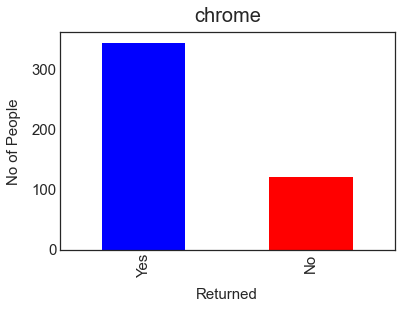

In [205]:
chrome['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('chrome', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

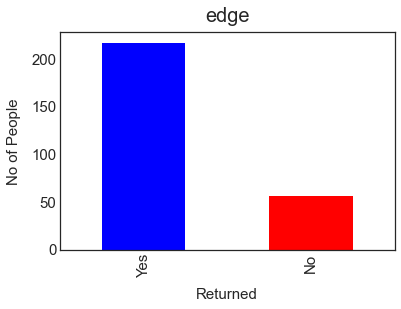

In [206]:
brsrs[brsrs['browser_Edge']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors)
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('edge', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

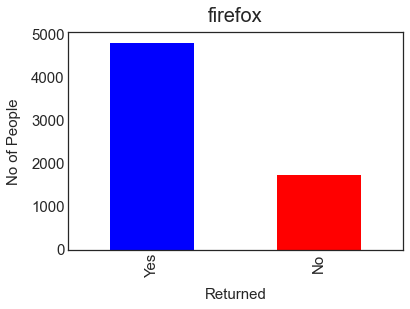

In [207]:
brsrs[brsrs['browser_Firefox']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('firefox', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

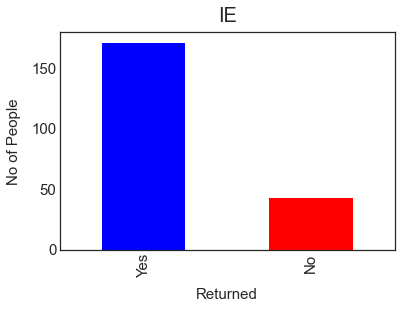

In [208]:
brsrs[brsrs['browser_IE']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('IE', y=1.02, size =20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

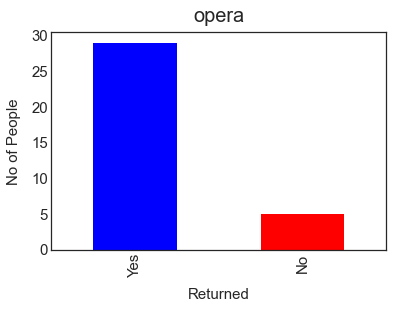

In [209]:
brsrs[brsrs['browser_Opera']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('opera', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

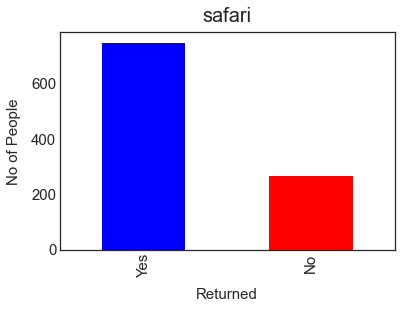

In [210]:
brsrs[brsrs['browser_Safari']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('safari', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

In [211]:
operating = clipped[os].copy()
operating

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows
user_id,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,0.0,0.0,1.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,1.0
100103232984930506871964919813308121190,1,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1,0.0,0.0,0.0,1.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,0.0,0.0,0.0,0.0,1.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,1.0
99919656312818559238262653068680812127,1,0.0,0.0,0.0,0.0,1.0


In [212]:
operating = operating.replace([1,0], ['Yes','No'])
operating

,returned,os_android,os_ios,os_linux,os_mac_os,os_windows
user_id,,,,,,
100057565415361423597239221229734238436,Yes,No,No,No,No,Yes
10008297250197642640412434822899674026,Yes,No,No,No,No,Yes
100103232984930506871964919813308121190,Yes,No,No,No,No,Yes
10018205113995011172245539900161896237,Yes,No,No,No,Yes,No
100190729904287278129130570309608601853,Yes,No,No,No,No,Yes
...,...,...,...,...,...,...
99887676488737159432361539159145911588,Yes,No,No,No,No,Yes
99888627541289760776496948385349027990,Yes,No,No,No,No,Yes
99919656312818559238262653068680812127,Yes,No,No,No,No,Yes


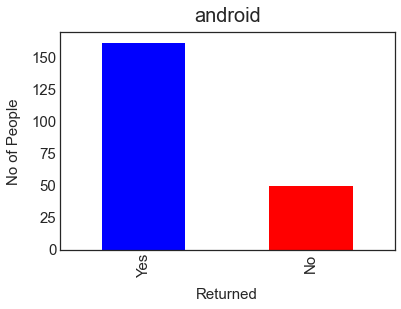

In [213]:
operating[operating['os_android']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('android', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

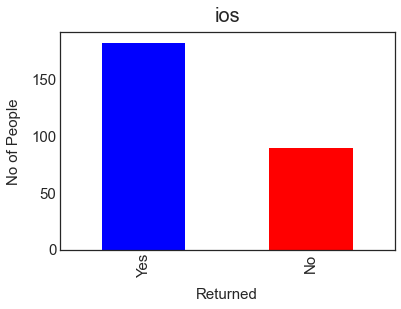

In [214]:
operating[operating['os_ios']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('ios', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

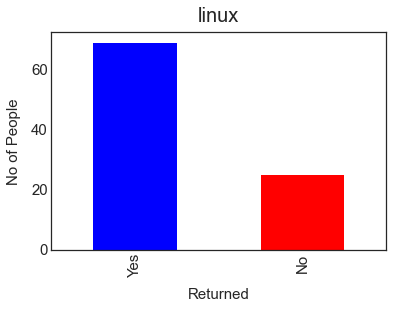

In [215]:
operating[operating['os_linux']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('linux', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

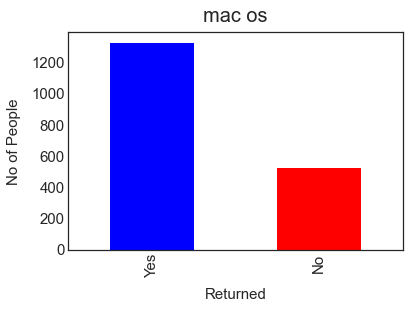

In [216]:
operating[operating['os_mac_os']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('mac os', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

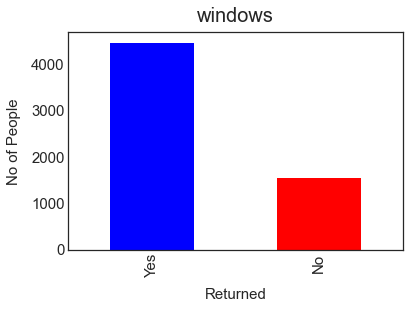

In [217]:
operating[operating['os_windows']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('windows', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

In [218]:
planer = clipped[plan].copy()
planer

,returned,plan_monthly,plan_yearly
user_id,,,
100057565415361423597239221229734238436,1,1.0,0.0
10008297250197642640412434822899674026,1,1.0,0.0
100103232984930506871964919813308121190,1,1.0,0.0
10018205113995011172245539900161896237,1,1.0,0.0
100190729904287278129130570309608601853,1,1.0,0.0
...,...,...,...
99887676488737159432361539159145911588,1,1.0,0.0
99888627541289760776496948385349027990,1,0.0,1.0
99919656312818559238262653068680812127,1,0.0,1.0


In [219]:
planer = planer.replace([1,0], ['Yes','No'])
planer

,returned,plan_monthly,plan_yearly
user_id,,,
100057565415361423597239221229734238436,Yes,Yes,No
10008297250197642640412434822899674026,Yes,Yes,No
100103232984930506871964919813308121190,Yes,Yes,No
10018205113995011172245539900161896237,Yes,Yes,No
100190729904287278129130570309608601853,Yes,Yes,No
...,...,...,...
99887676488737159432361539159145911588,Yes,Yes,No
99888627541289760776496948385349027990,Yes,No,Yes
99919656312818559238262653068680812127,Yes,No,Yes


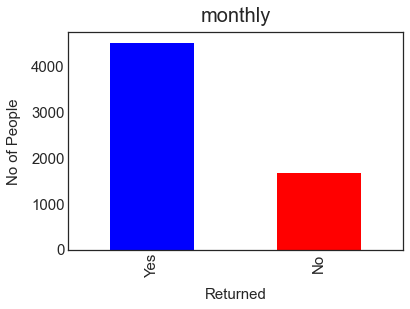

In [220]:
planer[planer['plan_monthly']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('monthly', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

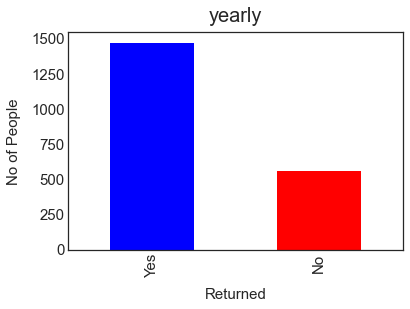

In [221]:
planer[planer['plan_yearly']=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
plt.xlabel("Returned", labelpad=10, size = 15)
plt.ylabel("No of People", labelpad=10, size = 15)
plt.title('yearly', y=1.02, size = 20)
plt.tick_params(axis='y', labelsize=15)
plt.tick_params(axis='x', labelsize=15)

In [222]:
pager = clipped[page].copy()
pager

,returned,page_compress,page_delete,page_edit,page_excel,page_extract,page_jpg,page_merge,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10008297250197642640412434822899674026,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100103232984930506871964919813308121190,1,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10018205113995011172245539900161896237,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100190729904287278129130570309608601853,1,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99888627541289760776496948385349027990,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99919656312818559238262653068680812127,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [223]:
pager = pager.replace([1,0], ['Yes','No'])
pager 

,returned,page_compress,page_delete,page_edit,page_excel,page_extract,page_jpg,page_merge,page_number-pages,page_ppt,page_protect,page_reader,page_rotate,page_share-document,page_sign,page_split,page_unlock,page_word
user_id,,,,,,,,,,,,,,,,,,
100057565415361423597239221229734238436,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No
10008297250197642640412434822899674026,Yes,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No
100103232984930506871964919813308121190,Yes,Yes,Yes,No,No,Yes,No,Yes,No,No,No,No,No,No,No,No,No,Yes
10018205113995011172245539900161896237,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
100190729904287278129130570309608601853,Yes,No,No,Yes,Yes,No,Yes,Yes,No,No,No,No,No,No,No,Yes,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99887676488737159432361539159145911588,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No
99888627541289760776496948385349027990,Yes,No,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No
99919656312818559238262653068680812127,Yes,Yes,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No


(8213, 18)


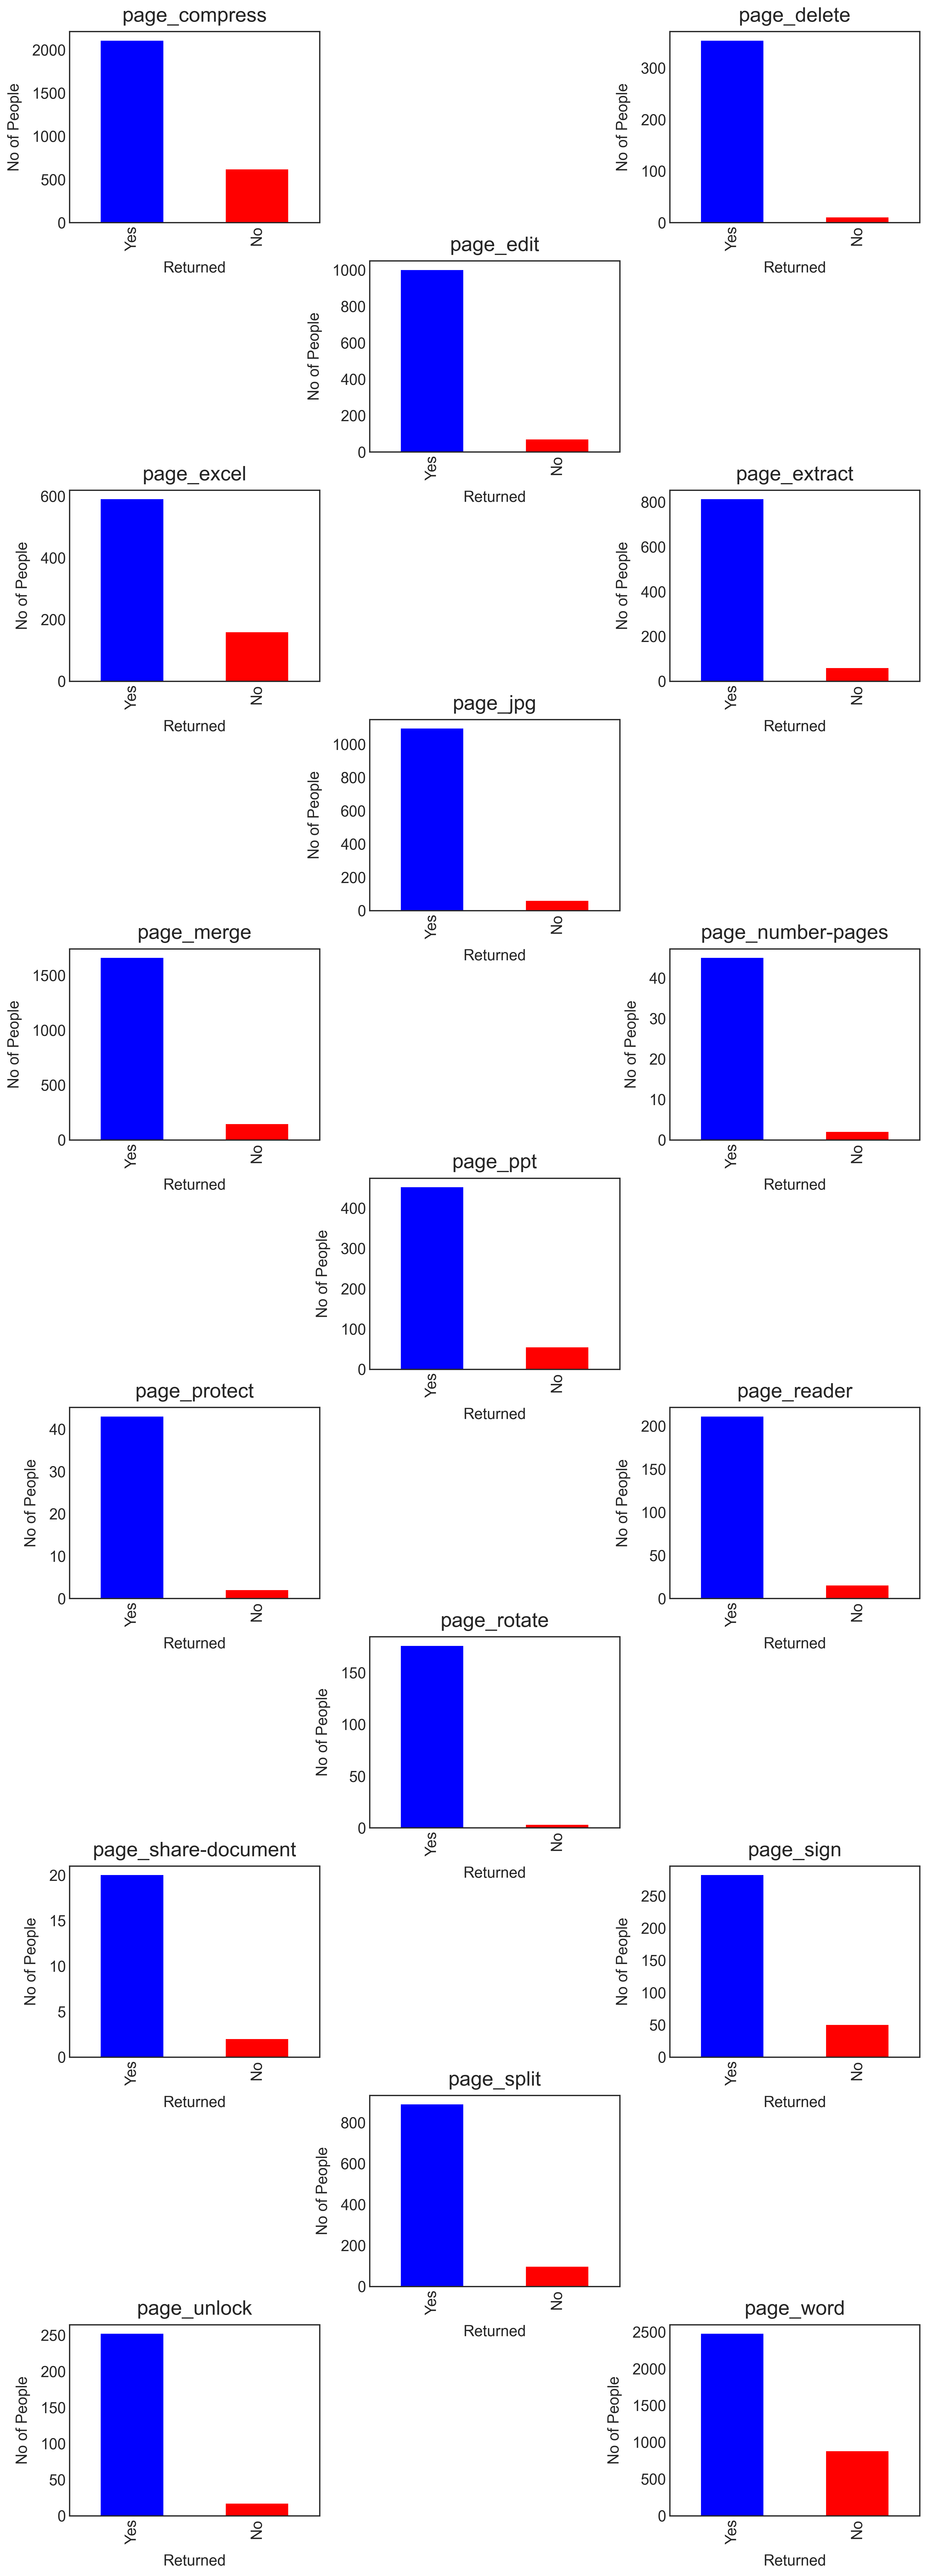

In [224]:
figure(figsize=(15, 45), dpi=300)
print(pager.shape)
px = pager.columns.values

for i in range(1, len(px)):
    plt.subplot(11, 3, 1+(i-1)*2)
    
    pager[pager[px[i]]=='Yes']['returned'].value_counts().plot(kind='bar', color = my_colors )
    plt.xlabel("Returned", labelpad=10, size = 15)
    plt.ylabel("No of People", labelpad=10, size = 15)
    plt.title(px[i], y=1.02, size = 20)
    plt.tick_params(axis='y', labelsize=15)
    plt.tick_params(axis='x', labelsize=15)

# End!
@saeid Vaghefi, September 26th 2021